<a href="https://colab.research.google.com/github/sikora-toma/gym-pendulum-control/blob/main/pendulum_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym

In [2]:
env = gym.make('Pendulum-v1')

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [3]:
env.observation_space

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)

In [4]:
!pip install pyvirtualdisplay PyOpenGL PyOpenGL-accelerate
!pip install gym[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 5.0 MB/s 
  Created wheel for PyOpenGL-accelerate: filename=PyOpenGL_accelerate-3.1.5-cp37-cp37m-linux_x86_64.whl size=1599518 sha256=ff6322683e05740dca0816db23450ac27c4e02d060b1d0eaa4deeab61a510f80
  Stored in directory: /root/.cache/pip/wheels/1c/f5/6f/169afb3f2d476c5e807f8515b3c9bc9b819c3962316aa804eb
Successfully built PyOpenGL-accelerate
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.0 MB/s 
     |████████████████████████████████| 296 kB 67.8 MB/s 
     |████████████████████████████████| 2.4 MB 45.3 MB/s 
     |████████████████████████████████| 3.4 MB 37.0 MB/s 
     |████████████████████████████████| 1.6 MB 49.7 MB/s 
     |████████████████████████████████| 18.3 MB 125 kB/s 
     |████████████████████████████████| 3.5 MB 47.3 MB/s 
     

In [5]:
!apt-get install python-opengl -y

!apt install xvfb -y

!pip install pyvirtualdisplay

!pip install piglet


from pyvirtualdisplay import Display
Display().start()

import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  freeglut3
Suggested packages:
  libgle3
The following NEW packages will be installed:
  freeglut3 python-opengl
0 upgraded, 2 newly installed, 0 to remove and 4 not upgraded.
Need to get 570 kB of archives.
After this operation, 5,733 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 570 kB in 0s (1,593 kB/s)
Selecting previously unselected package freeglut3:amd64.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../freeglut3_2.8.1-3_amd64.deb ...
Unpacking freeglut3:a

In [6]:
from math import atan2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
cos, sin, v = env.reset()

In [8]:
atan2(sin, cos)

1.0847834497363797

/usr/local/lib/python3.7/dist-packages/gym/core.py:44: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


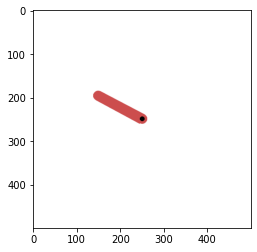

In [9]:
plt.imshow(env.render('rgb_array'))

In [131]:
def get_action_np(obs):
  return get_action(*obs)

def get_action(cos, sin, v):
  P = 10
  D = 2
  angle = atan2(sin, cos)
  torque = -P*angle - D * v
  return np.array([torque])

# TODO parent class Controller with get_action function maybe? inherit PID from it

class PID:
  def __init__(self, P=10, I=0, D=2):
    self.P, self.I, self.D = P, I, D
    self.integral = 0
  def __str__(self):
    return f"PID controller: P={self.P}, I={self.I}, D={self.D}"

  def get_action(self, cos, sin, v):
    angle = atan2(sin, cos)

    self.integral += angle

    torque = -self.P*angle - self.I * self.integral - self.D * v
    return np.array([torque])


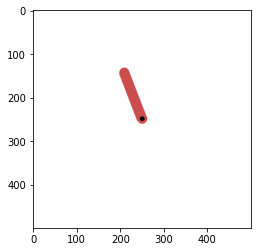

In [168]:
env = gym.make('Pendulum-v1')
obs = env.reset(options={'x_init':np.pi/8, 'y_init':0})
img = plt.imshow(env.render('rgb_array')) # only call this once

controller = PID(10, 0, 2)

torques, angles = [], []
# gym simulates at 20Hz, one step is 0.05s
for _ in range(100):
    #img.set_data(env.render('rgb_array')) # just update the data
    #display.display(plt.gcf())
    #display.clear_output(wait=True)
    action = controller.get_action(*obs)#env.action_space.sample()
    angles.append(atan2(obs[1], obs[0]))
    torques.append(action[0])
    obs, _, _, _ = env.step(action)

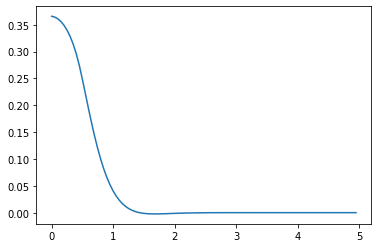

In [169]:
plt.plot([0.05*i for i in range(len(angles))], angles)

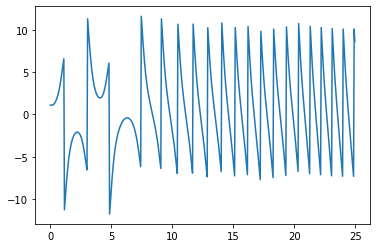

In [127]:
plt.plot([0.05*i for i in range(len(torques))], torques)

In [50]:
cos, sin, v = env.reset()
print(atan2(cos, sin)*180/3.14-90, get_action(cos, sin, v))

-121.70286630197982 [-20.42350601]


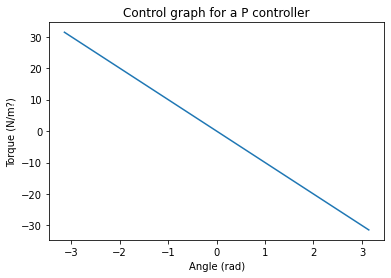

In [30]:
x = np.linspace(-2, 2, 100)
y = x ** 2


fig, ax = plt.subplots()
ax.plot(np.linspace(-np.pi, np.pi, 100), [get_action(np.cos(i), np.sin(i), 0) for i in np.linspace(-np.pi, np.pi, 100)])
ax.set(xlabel='Angle (rad)', ylabel='Torque (N/m?)',
       title='Control graph for a P controller')
plt.show()